# Mean Field Usage Example

In [1]:
import os
from pathlib import Path
import yaml
import numpy as np

In [2]:
from neuro_mod import mean_field

In [3]:
# Read the yaml
owd = Path.cwd()
wd = owd.parent
os.chdir(wd)
with open('configs/mf_simulation_config_template.yaml', 'r') as yml:
    config = yaml.safe_load(yml)
    network_params = config['network']
    runner_params = config['runner']
    sweep_params = config['sweep']
os.chdir(owd)

In [57]:
# Basic sweep exp
shifts = np.arange(0, .01, 0.0001)
vecs = np.zeros([4, len(shifts)])
vecs[0] += shifts
vecs[1] -= shifts
vecs = vecs.T
runner = mean_field.runners.MFSweepRunner(sweep_param='j_ext', mode='shift', **network_params)
runner.run(sweep_params=vecs, nu_init=runner_params['simple']['nu_init'])

array([[52.31891558, 52.37185956, 52.42447082, 52.4767555 , 52.52871953,
        52.5803687 , 52.6317086 , 52.68274467, 52.7334822 , 52.78392632,
        52.83408202, 52.88395414, 52.9335474 , 52.98286638, 53.03191556,
        53.08069926, 53.12922173, 53.17748708, 53.22549932, 53.27326235,
        53.32078   , 53.36805598, 53.4150939 , 53.4618973 , 53.50846962,
        53.55481423, 53.60093442, 53.64683338, 53.69251425, 53.73798008,
        53.78323385, 53.8282785 , 53.87311686, 53.91775172, 53.96218582,
        54.00642182, 54.05046231, 54.09430987, 54.13796697, 54.18143606,
        54.22471954, 54.26781973, 54.31073895, 54.35347942, 54.39604335,
        54.43843289, 54.48065016, 54.52269721, 54.56457608, 54.60628876,
        54.64783719, 54.68922328, 54.73044891, 54.77151592, 54.8124261 ,
        54.85318124, 54.89378306, 54.93423327, 54.97453354, 55.01468552,
        55.05469081, 55.094551  , 55.13426765, 55.17384228, 55.21327639,
        55.25257146, 55.29172893, 55.33075024, 55.3

In [58]:
# Effective
focus_nu_limits_1, focus_nu_limits_2 = runner_params['effective']['focus_nu_limits']
focus_nu_density_1, focus_nu_density_2 = runner_params['effective']['focus_nu_density']
nu_1, nu_2 = np.arange(*focus_nu_limits_1, focus_nu_density_1), np.arange(*focus_nu_limits_2, focus_nu_density_2)
nu_3, nu_4 = np.array(3.), np.array(4.)
focus_pops = [0, 1]

In [59]:
runner = mean_field.runners.EffectiveMFSweepRunner('j_ext',
                                                   'shift',
                                                   focus_pops,
                                                   nu_1, nu_2, nu_3, nu_4,
                                                   **network_params)
results_j_ext = runner.run(sweep_params=vecs, nu_init=runner_params['simple']['nu_init'])

In [69]:
runner = mean_field.runners.EffectiveMFSweepRunner('nu_ext',
                                                   'shift',
                                                   focus_pops,
                                                   nu_1, nu_2, nu_3, nu_4,
                                                   **network_params)
results_nu_ext = runner.run(sweep_params=vecs * 10., nu_init=runner_params['simple']['nu_init'])

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
diff_j_ext = abs(results_j_ext[0, 0, :] - results_j_ext[1, 0, :])
diff_nu_ext = abs(results_nu_ext[0, 0, :] - results_nu_ext[1, 0, :])

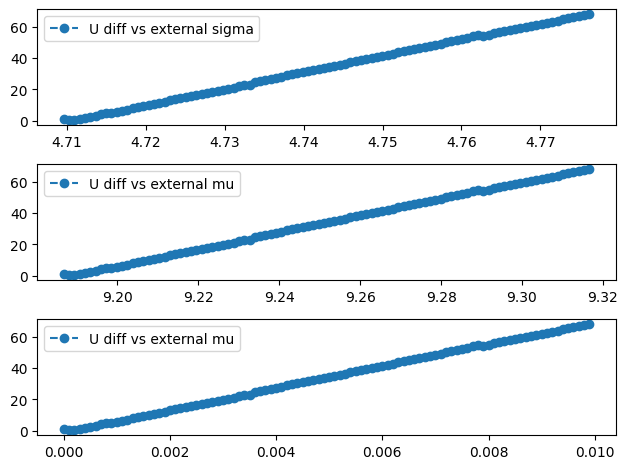

In [73]:
fig, ax = plt.subplots(nrows=3, ncols=1)
ax[0].plot(results_nu_ext[1, 2, :], diff_nu_ext, '--o', label='U diff vs external sigma')
ax[1].plot(results_nu_ext[0, 2, :], diff_nu_ext, '--o', label='U diff vs external mu')
ax[2].plot(shifts, diff_nu_ext, '--o', label='U diff vs external mu')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout()
plt.show()

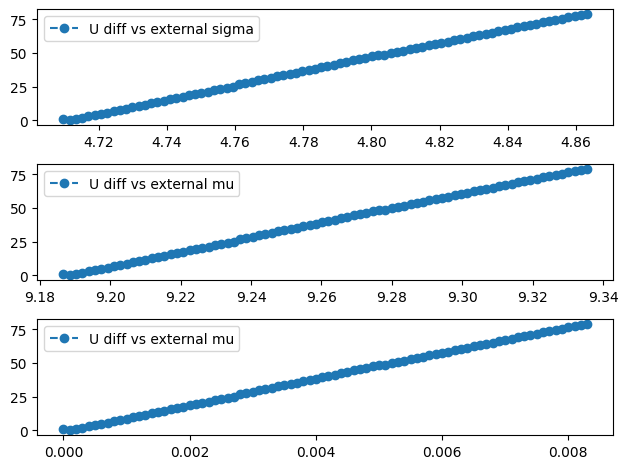

In [66]:
fig, ax = plt.subplots(nrows=3, ncols=1)
ax[0].plot(results_j_ext[1, 2, :], diff_j_ext, '--o', label='U diff vs external sigma')
ax[1].plot(results_j_ext[0, 2, :], diff_j_ext, '--o', label='U diff vs external mu')
ax[2].plot(shifts[:84], diff_j_ext, '--o', label='U diff vs external mu')
ax[0].legend()
ax[1].legend()
ax[2].legend()
fig.tight_layout()
plt.show()

In [19]:
results_j_ext[1, 2, :]

array([4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960007,
       4.70960007, 4.70960007, 4.70960007, 4.70960007, 4.70960